## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/rating_explicit_only.csv', sep=',', skipinitialspace=True)

n_users = df.learner_id.unique().shape[0]
n_items = df.movie_id.unique().shape[0]

print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 78 | Number of movies = 405


In [3]:
id_max = df.sort_values(by=['learner_id'], ascending=False).head(n=1)

id_max = int(id_max.learner_id)

print('The maximum learner_id in this list is= ' + str(id_max))

The maximum learner_id in this list is= 111


In [4]:
mv = pd.read_csv('../data/movie.csv', sep=',', skipinitialspace=True)

df['movie_knowledge_area'] = ''

In [5]:
lrn = pd.read_csv('../data/learner.csv', sep=',', skipinitialspace=True)

lrn.shape

(106, 12)

In [6]:
#copy the value of knowledge area from movies.csv
for index, row in df.iterrows():
    target_mv = mv.loc[mv.id == row.movie_id]
    df.movie_knowledge_area.iloc[index] = target_mv.movie_knowledge_area.values[0]

/home/guilherme/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
#get rating mean grouped by movie knowledge area

mean_ratings = df.groupby(['movie_knowledge_area'])['rating'].mean()

mean_ratings

movie_knowledge_area
BL    3.457831
EN    3.674419
HT    3.426752
LT    3.282427
MT    3.600000
PH    3.525510
Name: rating, dtype: float64

In [8]:
#add the profile features to the ratings dataframe

df['level_of_education'], df['level_of_english'], df['level_of_literature'], df['level_of_history'], df['level_of_biology'], df['level_of_physics'], df['level_of_math'], df['learning_goal'], df['learning_style'] = ['', '', '', '', '', '', '', '', ''] 

df.shape

(2426, 16)

In [9]:
#copy the profile levels from learner.csv

for index, row in df.iterrows():
    target_lrn = lrn.loc[lrn.id == row.learner_id]
    df.level_of_education.iloc[index] = target_lrn.level_of_education.values[0]
    df.level_of_english.iloc[index] = target_lrn.level_of_english.values[0]
    df.level_of_literature.iloc[index] = target_lrn.level_of_literature.values[0]
    df.level_of_history.iloc[index] = target_lrn.level_of_history.values[0]
    df.level_of_biology.iloc[index] = target_lrn.level_of_biology.values[0]
    df.level_of_physics.iloc[index] = target_lrn.level_of_physics.values[0]
    df.level_of_math.iloc[index] = target_lrn.level_of_math.values[0]
    df.learning_goal.iloc[index] = target_lrn.learning_goal.values[0]
    df.learning_style.iloc[index] = target_lrn.learning_style.values[0]
#     print(target_lrn)

/home/guilherme/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#get rating mean grouped by levels

mean_education = df.groupby(['level_of_education'])['rating'].mean()
mean_english = df.groupby(['level_of_english'])['rating'].mean()
mean_literature = df.groupby(['level_of_literature'])['rating'].mean()
mean_history = df.groupby(['level_of_history'])['rating'].mean()
mean_biology = df.groupby(['level_of_biology'])['rating'].mean()
mean_physics = df.groupby(['level_of_physics'])['rating'].mean()
mean_math = df.groupby(['level_of_math'])['rating'].mean()
mean_lgoal = df.groupby(['learning_goal'])['rating'].mean()
mean_lstyle = df.groupby(['learning_style'])['rating'].mean()

In [11]:
print('Means:\n' + str(mean_education) + '\n\n' + str(mean_english) + '\n\n' + str(mean_literature) + '\n\n' + str(mean_history) + '\n\n' + str(mean_biology) + '\n\n' + str(mean_physics) + '\n\n' + str(mean_math)+ '\n\n' + str(mean_lgoal)+ '\n\n' + str(mean_lstyle))

Means:
level_of_education
DT    3.135674
EF    5.000000
EM    3.790541
ES    3.008292
MT    3.394343
Name: rating, dtype: float64

level_of_english
HL    3.198221
LL    3.910000
ML    3.184840
Name: rating, dtype: float64

level_of_literature
HL    3.456967
LL    2.880282
ML    3.282482
Name: rating, dtype: float64

level_of_history
HL    3.702875
LL    3.261628
ML    3.117095
Name: rating, dtype: float64

level_of_biology
HL    3.940120
LL    3.231368
ML    3.130147
Name: rating, dtype: float64

level_of_physics
HL    3.236318
LL    3.351049
ML    3.149733
Name: rating, dtype: float64

level_of_math
HL    3.002795
LL    3.743976
ML    3.438914
Name: rating, dtype: float64

learning_goal
LLL    3.186104
STL    3.260477
Name: rating, dtype: float64

learning_style
GLB    3.329248
SQN    3.115641
Name: rating, dtype: float64


In [12]:
df.to_csv('../data/ratings_context.csv')

In [14]:
#get the item's rating mean

# df.rating = pd.to_numeric(df.rating, downcast = 'integer', errors='coerce')

items_mean = df.groupby(['movie_id'])['rating'].mean()
overall_mean = items_mean.mean()

overall_mean

3.071537344685492

In [16]:
#get the item bias

items_bias = items_mean - overall_mean

overall_bias = items_bias.mean()

overall_bias

9.3642514867149e-16

In [17]:
# #get specific user bias (baseline)

# def user_bias(user):
#     u_index = users_mean.index.get_loc(user) #get integer index through the label index
#     u_mean = users_mean[u_index] #get user mean
#     u_bias = u_mean - overall_mean #compute user bias
#     return(u_bias)

In [56]:
# save the bias on dataframe
df['profile_bias'] = np.nan

for index, row in df.iterrows():
    if row.level_of_literature == 'HL':
        df.profile_bias.iloc[index] = float(items_mean[row.movie_id]) - float(mean_literature[0])
    elif row.level_of_literature == 'LL':
        df.profile_bias.iloc[index] = float(items_mean[row.movie_id]) - float(mean_literature[1])
    elif row.level_of_literature == 'ML':
        df.profile_bias.iloc[index] = float(items_mean[row.movie_id]) - float(mean_literature[2])
    

/home/guilherme/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
df.to_csv('../data/ratings_bias.csv')

In [58]:
#get the contextual factor bias CAMF-CCI (na verdade eu teria que fazer a influencia de cada 
# valor contextual sobre o item e nao de cada categoria de contexto sobre o item CAMF-CCI é uma adap de CAMF-CI)

profile_bias = df.groupby(['learner_id'])['profile_bias'].mean()

total_profile_bias = items_mean.mean()+profile_bias.mean()+items_bias.mean()

total_profile_bias

3.1771793656197964

In [182]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(df,test_size=0.25)

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [183]:
#get the specific biases
def biases(B):
    #items mean
    train_mean = train_data.groupby(['movie_id'])['rating'].mean()
    test_mean = test_data.groupby(['movie_id'])['rating'].mean()

    #profile bias
    train_pbias = train_data.groupby(['learner_id'])['profile_bias'].mean()
    test_pbias = test_data.groupby(['learner_id'])['profile_bias'].mean()

    #items bias
    train_bias = train_mean - train_mean.mean()
    test_bias = test_mean - test_mean.mean()

    if B =='train':
        return train_mean.mean()+train_pbias.mean()+train_bias.mean()
    elif B =='test':
        return test_mean.mean()+test_pbias.mean()+test_bias.mean()


In [184]:
# Create training and test matrix
R = np.zeros((id_max, n_items))
for line in train_data.itertuples():
    R[line[6]-1, line[5]-1] = line[2]  

T = np.zeros((id_max, n_items))
for line in test_data.itertuples():
    T[line[6]-1, line[5]-1] = line[2]

In [185]:
# Index matrix for training data
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

# Index matrix for test data
I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [186]:
# Predict the unknown ratings through the dot product of the latent features for users and items 
def prediction(P,Q,IM,UB,IB):
    return (np.dot(P.T,Q)+IM+UB+IB)

In [196]:
lmbda = 0.5 # Regularisation weight
k = 8  # Dimensionality of the latent feature space
m, n = R.shape  # Number of users and items
n_epochs = 100  # Number of epochs
gamma=0.001  # Learning rate

P = 3 * np.random.rand(k,m) # Latent user feature matrix
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix

In [197]:
# Calculate the RMSE
def rmse(I,R,Q,P,B):
    return np.sqrt(np.sum((I * (R - (np.dot(P.T,Q)+biases(B)))**2)/len(R[R > 0])))

In [198]:
#calculate MAE
def mae(I,R,Q,P,B):
    return np.sum(abs((I * (R - (np.dot(P.T,Q)+biases(B)))/len(R[R > 0]))))

In [199]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []

#Only consider non-zero matrix 
users,items = R.nonzero()      
for epoch in range(n_epochs):
    error = 0
    for u, i in zip(users,items):
        e = R[u, i] - prediction(P[:,u],Q[:,i],items_mean[i+1],profile_bias[u+1],items_bias[i+1])  # Calculate error for gradient
        P[:,u] += gamma * ( e * Q[:,i] - lmbda * P[:,u]) # Update latent user feature matrix
        Q[:,i] += gamma * ( e * P[:,u] - lmbda * Q[:,i])  # Update latent movie feature matrix
#         error += e
#     train_e = abs(error/users.shape[0])
#     train_rmse = rmse(I,R,Q,P,'train') # Calculate root mean squared error from train dataset
#     test_rmse = rmse(I2,T,Q,P,'test') # Calculate root mean squared error from test dataset
#     train_mae = mae(I,R,Q,P,'train')
#     test_mae = mae(I2,T,Q,P,'test')
    train_mae = mean_absolute_error(R, np.dot(P.T,Q))
    test_mae = mean_absolute_error(T, np.dot(P.T,Q))
    train_errors.append(train_mae)
    test_errors.append(test_mae)
#     print("Epoch["+ str(epoch+1) + "/" + str(n_epochs) + "] Train error:" + str(train_mae) + "-->Test error:" + str(test_mae))

In [206]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(R, np.dot(P.T,Q))

5.4731433496751007

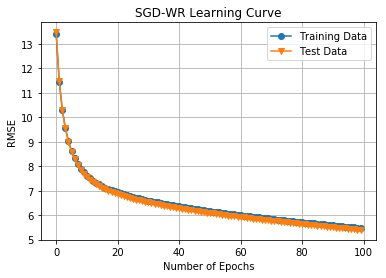

In [201]:
# Check performance by plotting train and test errors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');
plt.plot(range(n_epochs), test_errors, marker='v', label='Test Data');
plt.title('SGD-WR Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

The model seems to perform quite well, with a relatively low RMSE after convergence. The performance can be influenced by tweaking the hyperparameters $\lambda$, $\gamma$ and $k$. In order to learn more about hyperparameter tuning you can take a look at one of the previous [posts](http://online.cambridgecoding.com/notebooks/cca_admin/scanning-hyperspace-how-to-tune-machine-learning-models). 

Next you could compare the actual rating with the predicted rating. To do this you first calculate the prediction matrix – for that you can use ``prediction`` function you have implemented above and convert it to a dataframe for the ease of use.<img src="https://latex.codecogs.com/gif.latex?\hat&space;r_{ui}=P_u^TQ_i$&space;&space;$(2)" title="\hat r_{ui}=p_u^Tq_i" /> 

In [204]:
# Calculate prediction matrix R_hat (low-rank approximation for R)
R = pd.DataFrame(R)
R_hat=pd.DataFrame(np.dot(P.T,Q))

To get an idea of what you achieved, let's compare some of our predictions for user ``17`` with their actual ratings. 

In [ ]:
# Compare true ratings of user 17 with predictions
ratings = pd.DataFrame(data=R.loc[16,R.loc[16,:] > 0]).head(n=5)
ratings['Prediction'] = R_hat.loc[16,R.loc[16,:] > 0]
ratings.columns = ['Actual Rating', 'Predicted Rating']
ratings